##### http://blog.lisp4fun.com/2017/11/02/gradient-desent

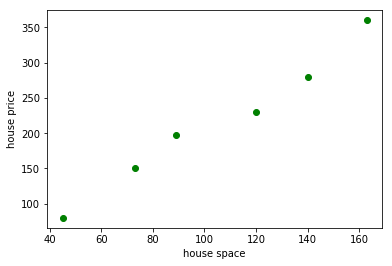

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

spaces = [45, 73, 89, 120, 140, 163]
prices = [80, 150, 198, 230, 280, 360]
spaces, prices = np.array(spaces), np.array(prices)
plt.scatter(spaces, prices, c='g')
plt.xlabel('house space')
plt.ylabel('house price')
plt.show()

## 显示房屋面积和房屋价格的散点图

 h(x) = 0.016206 + 2.078464 * x


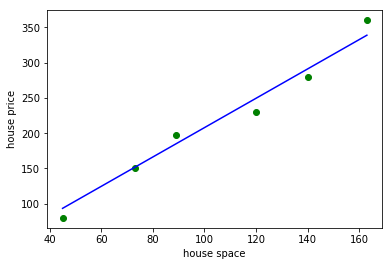

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## theta 初始值
theta0 = 0
theta1 = 0

## 如果步长选择不对，则 theta 参数更新结果会不对
step = 0.00005

x_i0 = np.ones((len(spaces)))

# 假设函数
def h(x) :
  return theta0 + theta1 * x

# 损失函数
def calc_error() :
  return np.sum(np.power((h(spaces) - prices),2)) / 6

# 损失函数偏导数( theta 0)
def calc_delta0() :
  return step * np.sum((h(spaces) - prices) * x_i0) / 6

# 损失函数偏导数( theta 1)
def calc_delta1() :
  return step * np.sum((h(spaces) - prices) * spaces) / 6

# 循环更新 theta 值并计算误差，停止条件为
#  1. 误差小于某个值
#  2. 循环次数控制
k = 0
while True :
  delta0 = calc_delta0()
  delta1 = calc_delta1()
  theta0 = theta0 - delta0
  theta1 = theta1 - delta1
  error = calc_error()
  # print("delta [%f, %f], theta [%f, %f], error %f" % (delta0, delta1, theta0, theta1, error))
  k = k + 1
  if (k > 10 or error < 200) : 
    break


print(" h(x) = %f + %f * x" % (theta0, theta1))
    
# 使用假设函数计算出来的价格，用于画拟合曲线
y_out = h(spaces)

plt.scatter(spaces, prices, c='g')
plt.plot(spaces, y_out, c='b')
plt.xlabel('house space')
plt.ylabel('house price')
plt.show()

# 绿色的点是房屋面积和价格数据
# 蓝色的线是我们使用梯度下降法拟合出来的曲线

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 输入数据格式:
##  1. 一个特征的是一维数组，表示样本
##  2. 多个特征的是二维数组，列表示特征数，行表示样本数
spaces = np.array([45, 73, 89, 120, 140, 163])
prices = np.array([80, 150, 198, 230, 280, 360])

# 步长
step = 0.00005

## 先计算输入的特征个数, 然后根据特征数生成 theta，并在样本数据前面插入一列全1数据
def genrate_model(inputs) :
  _features = 2
  _samples = inputs.shape[0]
  if len(inputs.shape) == 2 :
    _features = inputs.shape[2] + 1
  _x0 = np.ones(_samples)
  _theta = np.zeros(_features)
  return np.c_[_x0, inputs], _theta, _samples

## 假设函数：输入数据矩阵与theta向量向乘, 返回多项式结果的一维矩阵
def h_a(x) :
    return (theta * x).sum(axis=1)

## 损失函数
def e_a(x,y) :
  return np.sum(np.power((h_a(x) - y),2)) / m

## delta函数：计算偏导乘以补偿
def delta_a(x, y) :
  return step * ((h_a(x) - y) * np.transpose(x)).sum(axis=1) / m


## 系统的特征数 + 1
x_data, theta, m = genrate_model(spaces)
y_data = prices


## 重新计算 delta 并更新 theta
k = 0
while True:
    _d = delta_a(x_data, y_data)
    theta = theta - _d
    error = e_a(x_data, y_data)
    # print("delta", _d, "theta ", theta , ", error ", error, "k ", k)
    k = k + 1
    if (k > 10 or error < 200) :
      break;

# 打印 theta 结果，可以看出与上面 python 代码计算的结果是一致的。
print("theta array : " , theta)

theta array :  [ 0.01620597  2.07846445]
